In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [15]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,NaN,NaN,2.43,15.6,127.0,NaN,3.06,0.28,2.29,NaN,1.04,NaN,NaN
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,NaN,NaN,3.49,NaN,NaN,7.80,0.86,NaN,NaN
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,NaN,NaN,0.68,NaN,NaN,9.30,0.60,NaN,NaN


In [16]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	15
float64		column 2	30
float64		column 3	0
float64		column 4	31
float64		column 5	30
float64		column 6	60
float64		column 7	16
float64		column 8	45
float64		column 9	61
float64		column 10	15
float64		column 11	31
float64		column 12	76
float64		column 13	46


In [17]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,163.000000,148.000000,178.000000,147.000000,148.000000,118.000000,162.000000,133.000000,117.000000,163.000000,147.000000,102.000000,132.000000
mean,12.995767,2.393716,2.366517,19.392517,99.831081,2.228305,2.027593,0.363158,1.573675,5.093620,0.958884,2.591863,756.196970
std,0.807969,1.152284,0.274344,3.282479,14.615893,0.621866,0.975076,0.126942,0.602098,2.344736,0.234586,0.746833,313.533992
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.290000,278.000000
25%,12.335000,1.607500,2.210000,17.150000,88.000000,1.685000,1.205000,0.270000,1.140000,3.230000,0.780000,1.820000,508.000000
50%,13.050000,1.895000,2.360000,19.500000,98.000000,2.200000,2.170000,0.340000,1.530000,4.800000,0.970000,2.750000,680.000000
75%,13.655000,3.170000,2.557500,21.500000,107.000000,2.730000,2.887500,0.450000,1.960000,6.200000,1.120000,3.197500,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.520000,3.930000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

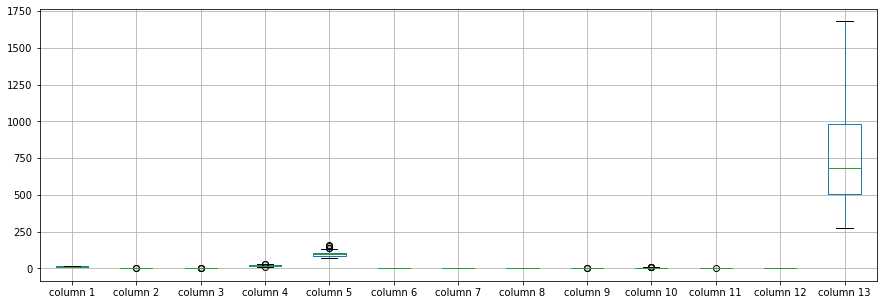

In [18]:
df.boxplot(return_type='axes', figsize=(15,5))

In [19]:
df.mean()

column 1      12.995767
column 2       2.393716
column 3       2.366517
column 4      19.392517
column 5      99.831081
column 6       2.228305
column 7       2.027593
column 8       0.363158
column 9       1.573675
column 10      5.093620
column 11      0.958884
column 12      2.591863
column 13    756.196970
dtype: float64

In [20]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.150073,0.188690,-0.254730,0.268957,0.233019,0.262822,-0.131569,0.140668,0.553089,-0.133694,0.027590,0.599758
column 2,0.150073,1.000000,0.141154,0.293022,-0.106421,-0.340683,-0.420082,0.314999,-0.176670,0.240163,-0.565991,-0.393468,-0.231394
column 3,0.188690,0.141154,1.000000,0.421555,0.253409,0.184597,0.095591,0.183621,0.069488,0.237418,-0.086764,-0.034263,0.238270
column 4,-0.254730,0.293022,0.421555,1.000000,-0.115880,-0.269765,-0.428827,0.375857,-0.094913,0.049874,-0.285569,-0.320409,-0.400773
column 5,0.268957,-0.106421,0.253409,-0.115880,1.000000,0.195708,0.230026,-0.318164,0.362625,0.160728,0.131384,0.068648,0.382866
column 6,0.233019,-0.340683,0.184597,-0.269765,0.195708,1.000000,0.872698,-0.427297,0.639421,-0.080187,0.448991,0.731108,0.493943
column 7,0.262822,-0.420082,0.095591,-0.428827,0.230026,0.872698,1.000000,-0.582095,0.657912,-0.216842,0.539732,0.809676,0.525424
column 8,-0.131569,0.314999,0.183621,0.375857,-0.318164,-0.427297,-0.582095,1.000000,-0.368947,0.225282,-0.280170,-0.568432,-0.358407
column 9,0.140668,-0.176670,0.069488,-0.094913,0.362625,0.639421,0.657912,-0.368947,1.000000,-0.058224,0.264183,0.543034,0.365624
column 10,0.553089,0.240163,0.237418,0.049874,0.160728,-0.080187,-0.216842,0.225282,-0.058224,1.000000,-0.550776,-0.492730,0.322962


In [21]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [22]:
imputer = md.Midas(layer_structure = [13,13+77,13+77+77,13+77+77,13+77+77+77+77,13+77+77+77+77+77,13+77+77+77+77+77+77,13+77+77+77+77+77,13+77+77+77+77,13+77+77+77,13+77+77,13+77,13], vae_layer = False, seed = 770)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 731.2547385475852
Epoch: 1 , loss: 719.0537719726562
Epoch: 2 , loss: 724.1418179598721
Epoch: 3 , loss: 738.4280506480824
Epoch: 4 , loss: 734.7131292169744
Epoch: 5 , loss: 726.3478560014205
Epoch: 6 , loss: 735.998457475142
Epoch: 7 , loss: 734.3327858664773
Epoch: 8 , loss: 731.4838312322444
Epoch: 9 , loss: 727.3215110085227
Epoch: 10 , loss: 735.6571266867898
Epoch: 11 , loss: 728.2987060546875
Epoch: 12 , loss: 730.4116876775569
Epoch: 13 , loss: 734.958662553267
Epoch: 14 , loss: 721.9610096324574
Epoch: 15 , loss: 729.0645557750355
Epoch: 16 , loss: 730.2976684570312
Epoch: 17 , loss: 722.1211270419034
Epoch: 18 , loss: 727.4620527787642
Epoch: 19 , loss: 720.2986561168324
Epoch: 20 , loss: 719.3958906693892
Epoch: 21 , loss: 721.6613658558239
Epoch: 22 , loss: 719.3479059392756
Epoch: 23 , loss: 720.1627363725142
Epoch: 24 , loss: 715.3151300603694
Epoch: 25 , loss: 706.2720780806108
Epoch: 2

In [23]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [24]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [25]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [26]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,-13.598344,-1.375945,0.0,0.0,0.000000,-2.494707,0.0,0.000000,0.000000,-5.198443,0.000000,-3.611373,-1061.036331
1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.0,-111.375597,-3.649697,0.0,-0.172810,-2.029342,0.000000,0.000000,-3.238738,-1475.637566
4,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
174,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
175,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
176,0.000000,0.000000,0.0,0.0,-117.774368,-1.334921,0.0,-0.403144,-1.214979,0.000000,0.000000,-1.290650,-833.992130


Calculating NRMSE Value

In [27]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [28]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [29]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(5331.7399475382235, 10898.078031484092)

In [30]:
NRMS=numerator/denominator
NRMS


0.48923671973489724

In [31]:
new_df.iloc[66,:]

column 1      13.110000
column 2       1.270962
column 3       1.700000
column 4      15.000000
column 5      78.000000
column 6       1.252306
column 7       3.180000
column 8       0.310338
column 9       0.894758
column 10      5.300000
column 11      0.742603
column 12      1.351484
column 13    502.000000
Name: 66, dtype: float64

In [32]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.631656,0.334055,2.43,15.6,127.000000,0.305293,3.06,0.280000,2.290000,0.441557,1.040000,0.308627,3.963669
1,13.200000,1.780000,2.14,11.2,100.000000,2.650000,2.76,0.260000,1.280000,4.380000,1.050000,3.400000,1050.000000
2,13.160000,2.360000,2.67,18.6,101.000000,2.800000,3.24,0.300000,2.810000,5.680000,1.030000,3.170000,1185.000000
3,14.370000,1.950000,2.50,16.8,1.624403,0.200303,3.49,0.067190,0.150658,7.800000,0.860000,0.211262,4.362434
4,13.240000,2.590000,2.87,21.0,118.000000,2.800000,2.69,0.390000,1.820000,4.320000,1.040000,2.930000,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.650000,2.45,20.5,95.000000,1.680000,0.61,0.520000,1.060000,7.700000,0.640000,1.740000,740.000000
174,13.400000,3.910000,2.48,23.0,102.000000,1.800000,0.75,0.430000,1.410000,7.300000,0.700000,1.560000,750.000000
175,13.270000,4.280000,2.26,20.0,120.000000,1.590000,0.69,0.430000,1.350000,10.200000,0.590000,1.560000,835.000000
176,13.170000,2.590000,2.37,20.0,2.225632,0.315079,0.68,0.126856,0.245021,9.300000,0.600000,0.329350,6.007870


In [33]:
imputations[-1].to_excel("Wine_AN_20(imp).xlsx", index=False, header=False)